# Notebook 5: Creating your first dashboard with Plotly and Dash


The objectives of this notebook are the following:

- Understand dashboards
- Creating your first dashboard

Here you have a link where all the information about Dash is available: https://dash.plotly.com/. Please refer to this link if you want any additional information.

Dash is basically a python framework for the creation of web applications.

# Part 0: Installation and setup

Let's first import dash and the libraries that we will use. Make sure that you have them downloaded and installed in the right environment!

These commands should help you install them in case you haven't installed them yet:

```
conda install -c conda-forge dash
conda install -c conda-forge jupyter-dash
conda install -c conda-forge dash-core-components
conda install -c conda-forge dash-html-components
conda install -c conda-forge dash-table
conda install -c conda-forge dash-bootstrap-components
```

Once you have installed all the above, you should be able to import the following:

In [331]:
import dash
from dash import dcc
from dash import html
from dash import dash_table
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash

# Part I: Creating our first Dashboard with Dash, python and Plotly

Great! If you run the above cell without running into errors, then you have all the required libraries installed. Now let's create our first simple Dashboard

In [332]:
app = JupyterDash('Creating our first Dash!', external_stylesheets=[dbc.themes.BOOTSTRAP])

We are going to use the `html` module from `dash`, which is a bridge between the commonly used and known html programming language and dash.

We will use only simple features to arrange the elements on the page. We wil create simple elements, using a python dictionary containing all the parameters (data -> "x", "y", "type", "name").  

In [333]:
app.layout = html.Div(children=[
  html.H1(children='Creating our first Dashboard with python and plotly'),
  dcc.Graph(id='example',
    figure={
      'data': [
        {'x': [1, 2], 
         'y': [1, 5],
         'type': 'line',
         'name': 'First line'},
        {'x': [1, 2], 
         'y': [3, 2],
         'type': 'bar',
         'name': 'First bars'},
        ],
      'layout': {
      'title': 'Creating our first Dash!'
        }
      })
  ])

In [334]:
app.run_server(mode='inline', host = '127.0.0.1', port=8051, debug=True)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Great! Now we have our first Dash! We could also run this through another server and see it on another port. Let's try it:

In [335]:
app.run_server(mode='external', host = '127.0.0.1', port=8051, debug=True)

Dash app running on http://127.0.0.1:8051/


Nice! That was very simple.

Now that we know the most basic way of making a dashboard, it's time to dive into Dashboards, and try to understand what it is used for. Dashboards and multi-chart displays that are used for monitoring and analysis.

One way to define Dashboard is as follows:

**A dashboard is a visual display of the most important information needed to achieve one or more objectives; consolidated and arranged on a single screen so the information can be monitored at a glance.**

[Source](https://www.perceptualedge.com/articles/visual_business_intelligence/dboard_confusion_revisited.pdf)

So, dashboards help us create a single screen that can give us information to monitor a process, or to analyze data. One important thing to remark from this same source is that:

**“The greatest clarification that is needed today is a distinction between dashboards, which are used for monitoring what’s going on, and displays that combine several charts on a screen for the purpose of analysis.”**

Thus, we need to remark the importance of distincting between a monitoring tool, and a display of faceted analytical display. Let's develop a little further what faceted analytical display is:

**A “faceted analytical display” is a set of charts (primarily graphs and tables) that simultaneously reside on a single screen, each of which presents a somewhat different view of a common dataset, and is used to analyze that information.**

So, now that we have a grasp of what Dashboard means, we can elaborate more complex displays or Dashboards. 

# Part II: Risk analysis Dashboard

Now let's create a more useful Dashboard. When we create a Dashboard, we always need to answer some basic questions such as:

- What data do we want to display in our dashboard?
- Who will use this dashboard?
- Will it be used by different people?
- What will it be used for?
- What are the key features in our dashboard?
- What useful comparisons should we show?
- etc...

So, first of all, we need to have a goal or aim with our dashboard. Once we know what we want to show, who will use it, and how do we want to display the information, we can start building the pieces of our Dashboard.

In this part, we will go back into the Cryptocurrencies data, and try to build a risk indicator, that should help us with our investments. Disclaimer: This is no financial advise, we are building this for the purpose of teaching how to build effective Dashboards. Use this results at your own risk in case of investment.

So first, let's load the data that we want to display, and plot it using `matplotlib` and `pandas` as this help us see what information we want to display in an easy and fast way.

In [336]:
from pandas import read_csv, to_datetime

df = read_csv('data/external/Coinbase_ETHEUR_dailydata.csv', parse_dates=['datetime'])
df.head(2)

,unix,low,high,open,close,volume,datetime,vol_fiat
0,1641427200,2916.58,3140.9,3131.63,3019.16,18773.797888,2022-01-06,5.668110e+07
1,1641340800,3008.56,3405.2,3355.88,3131.57,19546.423722,2022-01-05,6.121099e+07


Great, now we have the basic data, we have the low, high, open, close, and volume prices of Ethereum that we used in notebook 1. Since we are using time series data, we can use the "datetime" variable as the index of our dataframe:

In [337]:
df = df.set_index('datetime').sort_index()

In [338]:
df.head(2)

,unix,low,high,open,close,volume,vol_fiat
datetime,,,,,,,
2021-03-13,1615593600,1446.01,1595.0,1476.34,1575.08,26381.800363,4.155345e+07
2021-03-14,1615680000,1530.00,1581.6,1575.08,1546.17,16266.835746,2.515129e+07


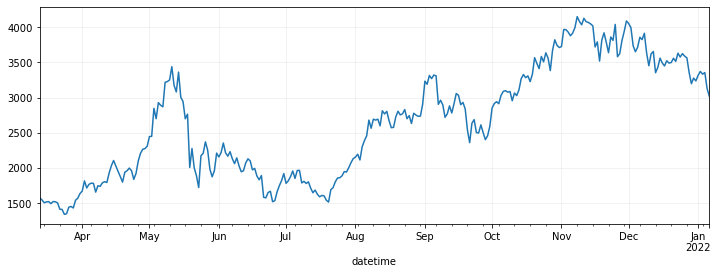

In [339]:
import matplotlib.pyplot as plt

df.close.plot(figsize=(12, 4))
plt.grid(True, alpha=.2)
plt.show()

So, first, we want to create useful and informative variables to show them in our dashboard. For this purpose, we create two variables. First, the "vol_fiat" variable, which is basically the product of the daily volume times the closing price, which is a proxy of the actual...

In [340]:
df['vol_fiat'] = df['volume'] * df['close'] # multiply the ETH volume by closing price to approximate fiat volume

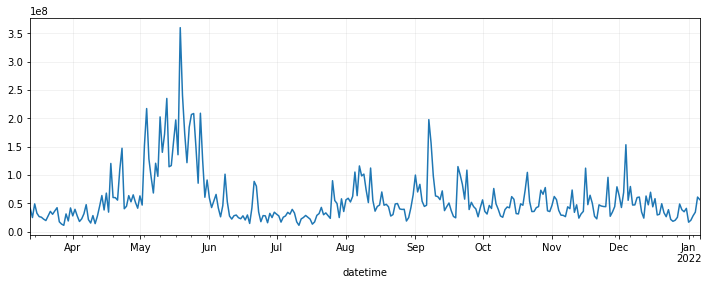

In [341]:
df.vol_fiat.plot(figsize=(12, 4))
plt.grid(True, alpha=.2)
plt.show()

Next, we will create another variable that shows our own risk indicator, that is the ratio between the average price of the lat 30 days compared to the last 90 days. This gives a proxy of how much the prices has increased in the last month compared to the last month, showing when the price have grown too much, and is likely to correct over the next periods.

In [342]:
df['risk_indicator'] = df['close'].rolling(window=30).mean().fillna(method='bfill') /\
                       df['close'].rolling(window=90).mean().fillna(method='bfill')

In [343]:
df.risk_indicator.describe()

count    300.000000
mean       1.036687
std        0.166936
min        0.759827
25%        0.876976
50%        1.075877
75%        1.176865
max        1.289069
Name: risk_indicator, dtype: float64

This variable is not normalized, in the sense that it ranges from 0.76 to 1.36. To make it more interpretable, we will normalize using a standarization, assuming that it follows a normal distribution. This variable is as follows:

In [344]:
df['risk_indicator_normalized'] = (df['risk_indicator'] - df['risk_indicator'].mean()) / df['risk_indicator'].std()

In [345]:
df.risk_indicator_normalized.describe()

count    3.000000e+02
mean    -1.973421e-15
std      1.000000e+00
min     -1.658482e+00
25%     -9.567193e-01
50%      2.347653e-01
75%      8.397126e-01
max      1.511855e+00
Name: risk_indicator_normalized, dtype: float64

Now we have a variable that ranges between -1.6 and 1.7. Let's make a scatterplot using as colors the risk that we just created:

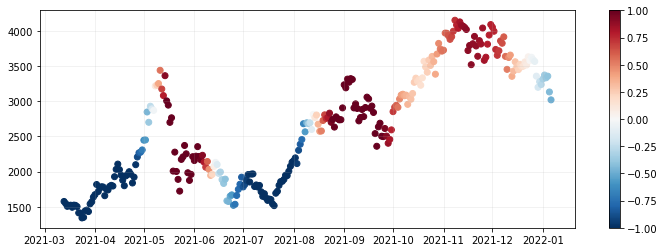

In [346]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
plt.scatter(df.index, df.close, c=df.risk_indicator_normalized, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()
plt.grid(True, alpha=.2)
plt.show()

In this time scatter plot we have each dot representing a day (X-axis), the Y-axis indicates the average closing price of Ethereum, and the color indicates the "risk" that we calculated previously, where blue colors indicate that the price has remained stable in the last month compared to the last three months, whereas red colors indicate that the price is less stable.

Now that we know what we want to plot, we will create this same chart in `plotly.express`.

In [347]:
import plotly.express as px

In [348]:
px.scatter(df, x=df.index, y=df.close, color=df.risk_indicator_normalized, color_continuous_scale='RdBu_r')

Notice that we are using a divergent colorscale to represent an attribute that changes in both directions from a middle point. We want this middle point 0, to match the white color on the scale. Thus, the colormap "RdBu_r" is appropriate. There are other Diverging Colormaps that you can find in [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [349]:
# TODO: Explain the 2nd graph, and what vol_fiat does and why we want to show it. Why do we want to show them together?

Next, we want to create another graph that can give us extra information about the risk. The second figure we are going to make is the Volume in Fiat (see this [link](https://en.wikipedia.org/wiki/Fiat_money) for further explanations. 

In [350]:
px.scatter(df, x=df.index, y=df.vol_fiat, color=df.risk_indicator_normalized, color_continuous_scale='RdBu_r')

And now we will use these same graphs to make our own Dashboard! 

In [351]:
app.layout = html.Div(children=[
  html.H1(children='Our amazing risk indicator!', 
          style={'textAlign': 'center'}),
      html.H2(children='Risk indicator #1'),
      dcc.Graph(id='risk_indicator_1',
        figure=px.scatter(df,
                      x=df.index, 
                      y=df.close, 
                      color=df.risk_indicator_normalized, 
                      color_continuous_scale='RdBu_r'
                         )
            ),
      html.H2(children='Risk indicator #2'),
      dcc.Graph(id='vol_fiat_1',
        figure=px.scatter(df,
                      x=df.index,
                      y=df.vol_fiat, 
                      color=df.risk_indicator_normalized, 
                      color_continuous_scale='RdBu_r')
             )
  ])

In [352]:
app.run_server(mode='external', host = '127.0.0.1', port=8051, debug=True)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://127.0.0.1:8051/


Great! Now we have created our first dashboard. We have simply joined two graphs into a Dashboard, to show different aspects of the risk that we want to represent.

# Part 3: Adding more charts to our dashboard

Add new graph with weekly data.

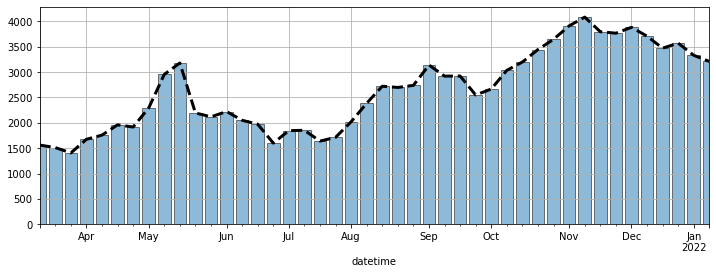

In [353]:
df.resample('W').mean()['close'].plot(figsize=(12, 4), color='k', linestyle='--', linewidth=3)
plt.bar(df.resample('W').mean()['close'].index,
       df.resample('W').mean()['close'], alpha=.5, edgecolor='k')
plt.grid(True)
plt.show()

In [354]:
df_resampled_weekly = df.resample('W').mean()['close']

In [355]:
df_resampled_weekly.head()

datetime
2021-03-14    1560.625000
2021-03-21    1511.580000
2021-03-28    1405.600000
2021-04-04    1673.977143
2021-04-11    1757.237143
Freq: W-SUN, Name: close, dtype: float64

In [356]:
df_last_days = df['close'].tail(8).diff(1).tail(7)

In [357]:
df_last_days.index = ['{}_days_ago'.format(j) for j in range(1, 8)]

In [358]:
from pandas import DataFrame

df_for_table = DataFrame(df_last_days)

In [359]:
import plotly.graph_objects as go
from numpy import round

fig = go.Figure(data=[go.Table(
        columnwidth = [30,30,30],
        header=dict(values=[i.replace('_', ' ') for i in df_for_table.T.columns.tolist()],
        line_color='darkslategray',
        align='center',
        font=dict(color='black', family="Lato", size=20),
        height=30
        ),
        cells=dict(values=round(df_for_table.T.values.tolist()[0], 2),
               line_color='darkslategray',
               align='left',
               font_color=[['green' if x > 0 else "red" if x < 0 else "blue"
                            ] for x in df_for_table.values],
       height=30
       ))
 ])


fig.show()

Notice that when we introduce multiple charts, Dash automatically places them one on top of each other. If we want to arrange them differently we need to get into the `dash.html` module.

Using bootstrap to make our dash adaptive to any screen resolution, we would need to use to use bootstrap and advanced html. In this exercises we will adjust the width and heigth of our charts manually.

In case you want to dig deeper in this topic, here you can find more information https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout/

In [360]:
app.layout = \
    html.Div(children=[
        html.H1(children='Our amazing risk indicator!', 
                      style={'textAlign': 'center'}),
        #first row
        html.Div(children=[
            # first row, first column
                html.H2(children='Risk indicator #1',style={'textAlign': 'center'}),
                dcc.Graph(id='risk_indicator_1',
                    figure=px.scatter(df,
                    x=df.index, 
                    y=df.close, 
                    color_continuous_midpoint=0,
                    color=df.risk_indicator_normalized, 
                    labels={'risk_indicator_normalized':'Risk', 'close':'Closing Price (€)', 'datetime':'Date'},
                    color_continuous_scale='RdBu_r',
                    width=1000, height=400, ### ADJUST THIS WIDTH AND HEIGHT ACCORDING TO YOUR SCREEN RESOLUTION
                         )
            )], style={'display':'inline-block'}),
            html.Div(children=[
            # first row, second column
                html.H2(children='Risk indicator #2',style={'textAlign': 'center'}),
                dcc.Graph(id='vol_fiat_1',
                    figure=px.scatter(df,
                    x=df.index,
                    y=df.vol_fiat, 
                    color_continuous_midpoint=0,
                    color=df.risk_indicator_normalized, 
                    labels={'risk_indicator_normalized':'Risk', 'vol_fiat':'Fiat Exchange Volume', 'datetime':'Date'},
                    color_continuous_scale='RdBu_r',
                    width=800, height=400) ### ADJUST THIS WIDTH AND HEIGHT ACCORDING TO YOUR SCREEN RESOLUTION
                        )], style={'display': 'inline-block'}),
    html.Div(children=[
        # second row
        html.Div(children=[
                # second row, first column
                html.H1(children='Weekly prices', style={'textAlign':'center'}),
                dcc.Graph(id='weeklyprices',
                          figure=px.line(df_resampled_weekly,
                                        x=df_resampled_weekly.index,
                                        y=df_resampled_weekly.values,
                                        labels={'y':'Price ETH (€)', 'datetime':'Date'}
                                        ))
            ]),
                # second row, second columns
                    html.Div(children= [
                        dcc.Graph(id='table', 
                                  figure=go.Figure(data=[go.Table(
                                    columnwidth = [30,30,30],
                                    header=dict(values=[i.replace('_', ' ') for i in df_for_table.T.columns.tolist()],
                                    # fill_color='#b9e2ff',
                                    line_color='darkslategray',
                                    align='center',
                                    font=dict(color='black', family="Lato", size=20),
                                    height=30 ### ADJUST THIS WIDTH AND HEIGHT ACCORDING TO YOUR SCREEN RESOLUTION
                                    ),
                                cells=dict(values=round(df_for_table.T.values.tolist()[0], 2),
                                       line_color='darkslategray',
                                       align='left',
                                       font_color=[['green' if x >0 else       
                                       "red" if x < 0 else "blue"
                                       ] for x in df_for_table.values],
                                       height=30 ### ADJUST THIS WIDTH AND HEIGHT ACCORDING TO YOUR SCREEN RESOLUTION
                                       ))
             ]))
        ]),        
        ])       
])

In [361]:
app.run_server(mode='external', host = '127.0.0.1', port=8051, debug=True)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://127.0.0.1:8051/


# Exercise 1:

Create the same graphs and dashboards from above, now using the BTC data that we downloaded in the previous notebook: `Coinbase_BTCEUR_dailydata.csv`.

In [362]:
# First import the libraries that we need to use
from pandas import DataFrame, to_datetime
import requests
import json


In [363]:
def fetch_daily_data(symbol):

    pair_split = symbol.split('/')  # symbol must be in format XXX/XXX ie. BTC/EUR
    symbol = pair_split[0] + '-' + pair_split[1]
    url = f'https://api.pro.coinbase.com/products/{symbol}/candles?granularity=86400'
    response = requests.get(url)
    if response.status_code == 200:  # check to make sure the response from server is good
        data = DataFrame(json.loads(response.text), columns=['unix', 'low', 'high', 'open', 'close', 'volume'])
        data['datetime'] = to_datetime(data['unix'], unit='s')  # convert to a readable date
        data['vol_fiat'] = data['volume'] * data['close']      # multiply the BTC volume by closing price to approximate fiat volume

        # if we failed to get any data, print an error...otherwise write the file
        if data is None:
            print("Did not return any data from Coinbase for this symbol")
        else:
            data.to_csv(f'data/external/Coinbase_{pair_split[0] + pair_split[1]}_dailydata.csv', index=False)

    else:
        print("Did not receieve OK response from Coinbase API")
        

In [364]:
fetch_daily_data('BTC/EUR')
fetch_daily_data('ETH/EUR')
fetch_daily_data('ADA/EUR')
fetch_daily_data('SOL/EUR')

In [365]:
from pandas import read_csv

df_btc = read_csv('data/external/Coinbase_BTCEUR_dailydata.csv', parse_dates=['datetime'])
df_eth = read_csv('data/external/Coinbase_ETHEUR_dailydata.csv', parse_dates=['datetime'])
df_ada = read_csv('data/external/Coinbase_ADAEUR_dailydata.csv', parse_dates=['datetime'])
df_sol = read_csv('data/external/Coinbase_SOLEUR_dailydata.csv', parse_dates=['datetime'])

list_dfs = [df_btc, df_eth, df_ada, df_sol]

In [366]:
list_coins = ['BTC', 'ETH', 'ADA', 'SOL']
count =0 
for df in list_dfs:
    list_dfs[count]['coin'] = list_coins[count]
    count += 1

In [367]:
from pandas import concat

data_crypto = concat(list_dfs, axis=0)

data_crypto.head()

,unix,low,high,open,close,volume,datetime,vol_fiat,coin
0,1641427200,37550.00,38736.03,38449.22,38050.36,1520.269617,2022-01-06,5.784681e+07,BTC
1,1641340800,37600.00,41631.74,40623.36,38447.98,2113.026167,2022-01-05,8.124159e+07,BTC
2,1641254400,40370.71,42100.00,41123.26,40636.22,956.141383,2022-01-04,3.885397e+07,BTC
3,1641168000,40482.74,41923.25,41635.86,41123.69,736.908892,2022-01-03,3.030441e+07,BTC
4,1641081600,41066.46,42257.24,42013.43,41650.43,573.807277,2022-01-02,2.389932e+07,BTC


In [368]:
data_grouped_weekly = data_crypto.groupby(['datetime', 'coin']).first()['close'].unstack(1).resample('2W').mean()

In [369]:
fig = px.bar(data_grouped_weekly, barmode='group')
fig.show()

In [370]:
fig = px.bar((data_grouped_weekly-data_grouped_weekly.mean())/data_grouped_weekly.std(),
             barmode='group')
fig.show()

In [371]:
data_grouped_weekly_normalized = data_grouped_weekly / data_grouped_weekly.max()

In [372]:
data_grouped_weekly_normalized_new = data_grouped_weekly_normalized.fillna(0).div(data_grouped_weekly_normalized.fillna(0).sum(axis=1),
                                             axis=0)
fig = px.bar(data_grouped_weekly_normalized_new, 
             barmode='relative',
             color_discrete_map={
        'BTC': 'yellowgreen',
        'ETH': 'darkblue',
        'ADA': 'red',
        'SOL': 'green'
    })
fig.show()

In [373]:
app.layout = \
    html.Div(children=[
        html.H1(children='Crypto currency Dash', 
                      style={'textAlign': 'center'}),
        #first row
        html.Div(children=[
            # first row, first column
                html.H2(children='Graph #1',style={'textAlign': 'center'}),
                dcc.Graph(id='graph_1',
                    figure=px.bar(data_grouped_weekly, barmode='group', 
                    labels={'Graph_1':'Example 1', 'close':'Closing Price (€)', 'datetime':'Date'},
                    width=1000, height=400, ### ADJUST THIS WIDTH AND HEIGHT ACCORDING TO YOUR SCREEN RESOLUTION
                         )
            )]),
            html.Div(children=[
            # first row, second column
                html.H2(children='Graph #2',style={'textAlign': 'center'}),
                dcc.Graph(id='graph_2',
                    figure=px.bar((data_grouped_weekly-data_grouped_weekly.mean())/data_grouped_weekly.std(),
                                  barmode='group',
                                  width=900, height=350) ### ADJUST THIS WIDTH AND HEIGHT ACCORDING TO YOUR SCREEN RESOLUTION
                        )]),
    html.Div(children=[
        # second row
        html.Div(children=[
                # second row, first column
                html.H1(children='Graph 3', style={'textAlign':'center'}),
                dcc.Graph(id='graph_3',
                          figure=px.bar(data_grouped_weekly_normalized, barmode='group',
                                        color_discrete_map={
                                            'BTC': 'yellowgreen',
                                            'ETH': 'darkblue',
                                            'ADA': 'red',
                                            'SOL': 'green'},
                                        labels={'y':'Price ETH (€)', 'datetime':'Date'}
                                        ))
        ]),
                
        ])       
])

In [374]:
app.run_server(mode='external', host = '127.0.0.1', port=8051, debug=True)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://127.0.0.1:8051/


# Additional exercise for advanced users (Optional)

Can you create a Dashboard to compare the two coins? You can use our risk indicators, or create new ones that you find interesting and insightful. 

In [375]:
data_crypto['risk_indicator'] = data_crypto['close'].rolling(window=30).mean().fillna(method='bfill') /\
                       data_crypto['close'].rolling(window=90).mean().fillna(method='bfill')

In [376]:
data_crypto['risk_indicator_normalized'] = (data_crypto['risk_indicator'] - data_crypto['risk_indicator'].mean()) / data_crypto['risk_indicator'].std()

In [377]:
df_data_crypto = data_crypto.set_index('datetime').sort_index()

In [378]:
df_data_crypto.head()

,unix,low,high,open,close,volume,vol_fiat,coin,risk_indicator,risk_indicator_normalized
datetime,,,,,,,,,,
2021-03-13,1615593600,46966.09,50776.82,47810.00,50194.10,2351.299235,1.180213e+08,BTC,1.137017,0.458503
2021-03-13,1615593600,1446.01,1595.00,1476.34,1575.08,26381.800363,4.155345e+07,ETH,0.759827,-0.280248
2021-03-14,1615680000,49244.00,50680.00,50153.05,49381.87,1299.084908,6.415124e+07,BTC,1.142812,0.469853
2021-03-14,1615680000,1530.00,1581.60,1575.08,1546.17,16266.835746,2.515129e+07,ETH,0.761824,-0.276336
2021-03-15,1615766400,46000.00,50595.07,49382.43,46715.08,3345.282013,1.562751e+08,BTC,1.151843,0.487540


In [379]:
app.layout = html.Div(children=[
  html.H1(children='Crypto Currency Risk Indicator!', 
          style={'textAlign': 'center'}),
      html.H2(children=''),
      dcc.Graph(id='risk_indicator_1',
        figure=px.bar(data_crypto,
                      x=df_data_crypto.index, 
                      y=data_crypto.risk_indicator_normalized, 
                      color="coin"
                         )
            )
  ])

In [380]:
app.run_server(mode='external', host = '127.0.0.1', port=8051, debug=True)

Dash app running on http://127.0.0.1:8051/


/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



----

So, on a final note, the main points taken from the [same article](https://www.perceptualedge.com/articles/visual_business_intelligence/dboard_confusion_revisited.pdf) as above:

- Dashboards and multi-chart displays that are used for analysis are quite different.
- Faceted analytical displays provide a powerful means to see relationships in data.
- Global filters and brushing are powerful features that should be supported by any good faceted analytical dis- play.
- No matter how great your tool, faceted analytical displays only work if you design them properly.


So, now that you know how Dash works, you can create your own Dashboards. Throughout this course we have taught you how to use plotly to create your own visualizations, and now you can wrap them up to create your own story and integrate them into an effective and informative dashboard. From simple linecharts, to spatial visualizations, you can include all of them thanks to plotly and dash!